In [2]:
import ROOT

Welcome to JupyROOT 6.30/07


In [1]:
CR_cut = f"""(
    (((jet_mass>50) & (jet_mass<80)) | (jet_mass>150)) & 
    (tagger>0.8) & (tagger<0.98)
)"""

In [32]:


f = ROOT.TFile(f"input/Run2/data.root", "r")
tree = f.Get("Events")
fit_mass = ROOT.RooRealVar("fit_mass", "fit_mass", 1500, 650, 4000)
weight = ROOT.RooRealVar("weight", "weight", 1, -10, 10)
jet_mass = ROOT.RooRealVar("jet_mass", "jet_mass", 125, 0, 999)
tagger = ROOT.RooRealVar("tagger", "tagger", 0, 0, 2)
data_region = ROOT.RooDataSet(f"data_CR", f"data_CR", tree, ROOT.RooArgSet(fit_mass, weight, jet_mass, tagger), CR_cut, "weight")
p1 = ROOT.RooRealVar("p1", "p1", -0.1, -10, 0)
model = ROOT.RooGenericPdf("model_background_expow1", "model_background_expow1", "TMath::Power(@0, @1)", ROOT.RooArgList(fit_mass, p1))
result = model.fitTo(data_region, ROOT.RooFit.SumW2Error(True), Save=True)
p1.setConstant(True)
bkg_component = ROOT.RooArgSet(model)

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(fit_mass) TTree Float_t branch fit_mass will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(weight) TTree Float_t branch weight will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(jet_mass) TTree Float_t branch jet_mass will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(tagger) TTree Float_t branch tagger will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data_CR) Skipping event #0 because fit_mass cannot accommodate the value 643.904
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data_CR) Skipping event #1 because fit_mass cannot accommodate the value 548.344
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data_CR) Skipping event #4 because fit_mass cannot accommodate the value 542.411
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data_CR) Skipping event #

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       6712.079068 Edm =      -77.60790577 NCalls =      5
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 5501.880181
  Edm           : 72.69037221
  Internal parameters:	[     0.3932614751]	
  Internal gradient  :	[      603.5505888]	
  Internal covariance matrix:
[[  0.00079819597]]]
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5501.880181
  Edm           : 72.69037221
  Internal parameters:	[     0.3932614751]	
  Internal gradient  :	[      603.5505888]	
  Internal covariance matrix:
[[  0.00079819597]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       5501.880181 Ed

In [31]:
canvas = ROOT.TCanvas()
xframe = fit_mass.frame(650, 3000)
data_region.plotOn(xframe)
model.plotOn(xframe, ROOT.RooFit.VisualizeError(result, 1, True), ROOT.RooFit.Components(bkg_component), ROOT.RooFit.Name("errorband"), ROOT.RooFit.FillColor(ROOT.kOrange), ROOT.RooFit.Range("Full"), ROOT.RooFit.NormRange("Full"))
data_region.plotOn(xframe, ROOT.RooFit.Name("data"))
model.plotOn(xframe,ROOT.RooFit.LineColor(3),ROOT.RooFit.Components(bkg_component), ROOT.RooFit.Name("bkg"), ROOT.RooFit.LineStyle(2), ROOT.RooFit.Range("Full"), ROOT.RooFit.NormRange("Full"))
xframe.Draw()
canvas.SaveAs('./test.pdf')

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_background_expow1) only plotting range 'Full'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_background_expow1) p.d.f. curve is normalized using explicit choice of ranges 'Full'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_background_expow1) directly selected PDF components: (model_background_expow1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_background_expow1) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_expow1_Int[fit_mass]) using numeric integrator RooRombergIntegrator to calculate Int(fit_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_expow1_Int[fit_mass|Full]_Norm[fit_mass]) using numeric integrator RooRombergIntegrator to calculate Int(fit_mass)
[#0] WARNING:Plotting -- Fill color or style was set for plotting "model_background_expow1", but these only have an effect when 'DrawOption("F")' for fill is used at the same time.
[#1] INFO:Plott

Info in <TCanvas::Print>: pdf file ./test.pdf has been created


<cppyy.gbl.TVirtualPad* object at 0xbd0b2f0>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_expow1_Int[fit_mass]) using numeric integrator RooRombergIntegrator to calculate Int(fit_mass)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_background_expow1) directly selected PDF components: (model_background_expow1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_background_expow1) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_expow1_Int[fit_mass]) using numeric integrator RooRombergIntegrator to calculate Int(fit_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_expow1_Int[fit_mass]) using numeric integrator RooRombergIntegrator to calculate Int(fit_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_expow1_Int[fit_mass]) using numeric integrator RooRombergIntegrator to calculate Int(fit_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_expow1_Int[fit_mass]) using numeric 

Info in <TCanvas::Print>: pdf file test.pdf has been created


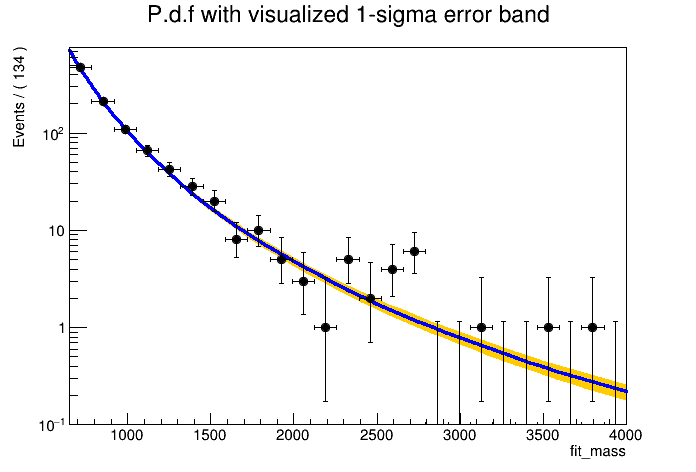

In [48]:
c = ROOT.TCanvas()
ROOT.gPad.SetLogy()

frame = fit_mass.frame(Bins=40, Title="P.d.f with visualized 1-sigma error band")
fit_mass.setBins(25)
d = model.generateBinned({fit_mass}, 1000)
d.plotOn(frame)
#model.plotOn(frame, VisualizeError=(result, 1), FillColor="kOrange")
#model.plotOn(frame, VisualizeError=(result, 1, False), DrawOption="L", LineWidth=2, LineColor="r")
model.plotOn(frame, VisualizeError=(result, 1), FillColor="kOrange", Components="model_background_expow1")
"""
model.plotOn(
    frame,
    VisualizeError=(result, 1, False),
    DrawOption="L",
    LineWidth=2,
    LineColor="r",
    Components="model_background_expow1",
    LineStyle="--",
)
"""
model.plotOn(frame)
model.plotOn(frame, Components="model_background_expow1", LineStyle="--")
d.plotOn(frame)
frame.SetMinimum(1e-1)


frame.Draw()
c.SaveAs("test.pdf")